In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats

[27.953554431373153, 19.843859069792124, -1.0, 28.051633379201135, 28.30728413315098]
[5.6621341715754046, 5.312828747322713, 0.0, 5.8330320582194455, 5.541677814072446]


Text(0.5, 1.0, 'Average Reward across 1000 episodes in experiment MDP')

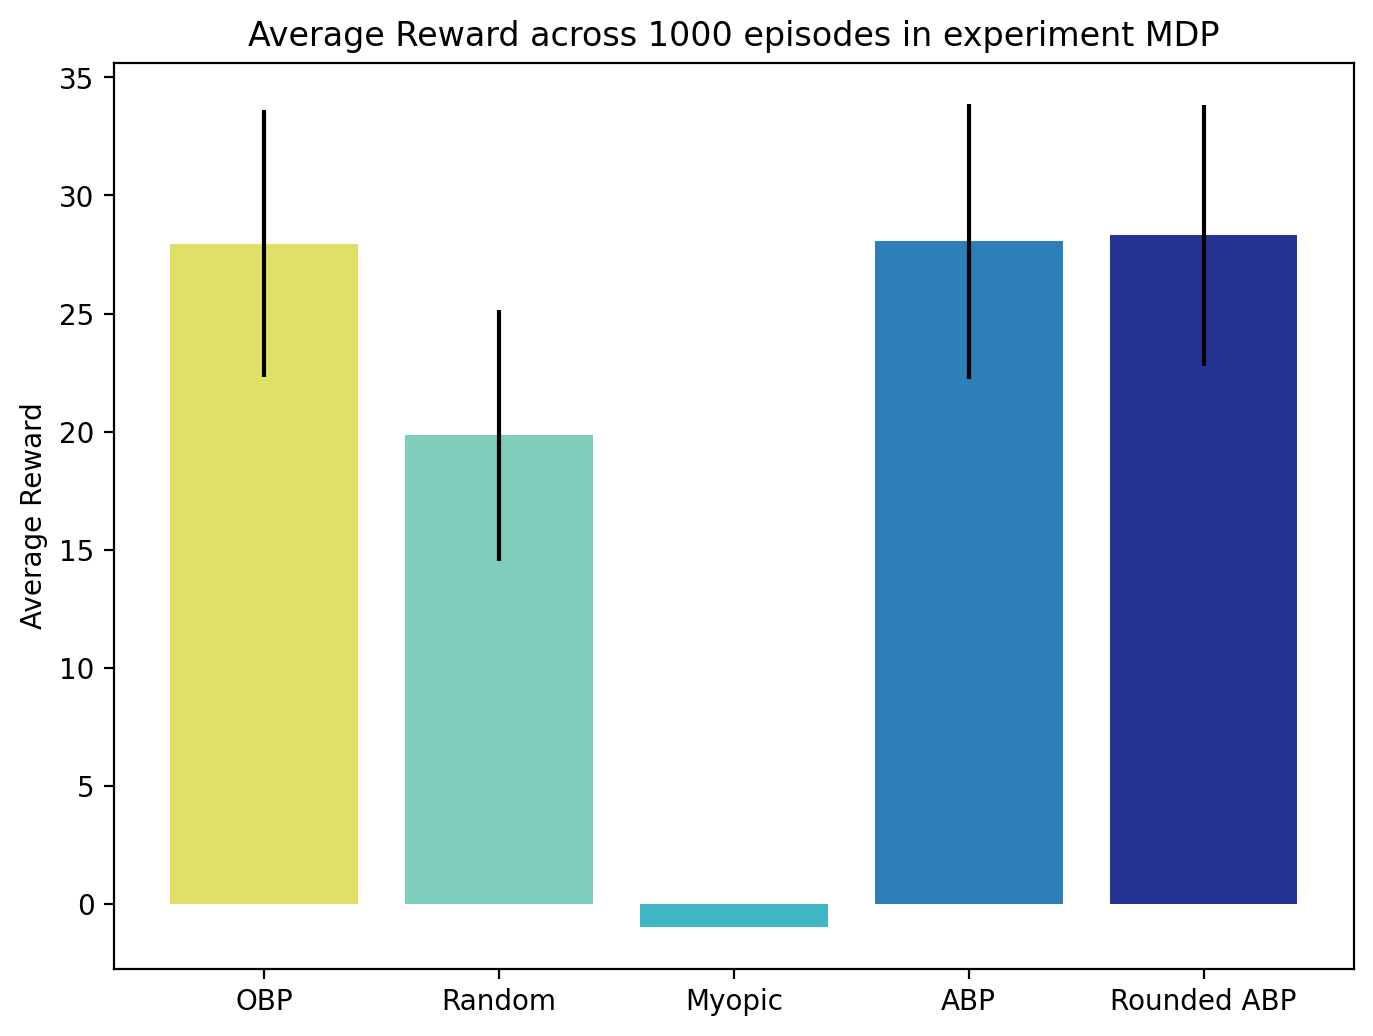

In [6]:
opt = pd.read_json("./results/pilot/results_Myopic_OptPseudoRewards.json")
#hc = pd.read_json("./results/pilot/results_HandCrafted.json")
ma = pd.read_json("./results/pilot/results_GoalPRwnP.json")
r = pd.read_json("./results/pilot/results_Random.json")
m = pd.read_json("./results/pilot/results_Myopic.json")
rou = pd.read_json("./results/pilot/results_RoundedPointswnP.json")

data = [opt, r, m, ma, rou]
labels = ["OBP", "Random", "Myopic", "ABP","Rounded ABP"]
mean = []
std = []
for df in data:
    mean.append(df.groupby("run")["rewards"].mean().mean())
    std.append(df.groupby("run")["rewards"].mean().std())
print(mean)
print(std)
fig = plt.figure(figsize= (8,6), dpi = 200)
plt.bar(labels, mean, yerr = std,  color = [ "#e0e069","#7fcdbb","#41b6c4","#2c7fb8","#253494"])
plt.ylabel("Average Reward")
plt.title("Average Reward across 1000 episodes in experiment MDP")

[99.98013519946338, 7.321385358811453, -0.4431725980689796, 98.9579188632381, 97.98121455224762]
[8.839440547974522, 0.015467863017924221, 0.010479296130446139, 8.178208238355321, 8.968501644541629]


Text(0.5, 1.0, 'Average Reward across 1000 episodes in simplified MDP')

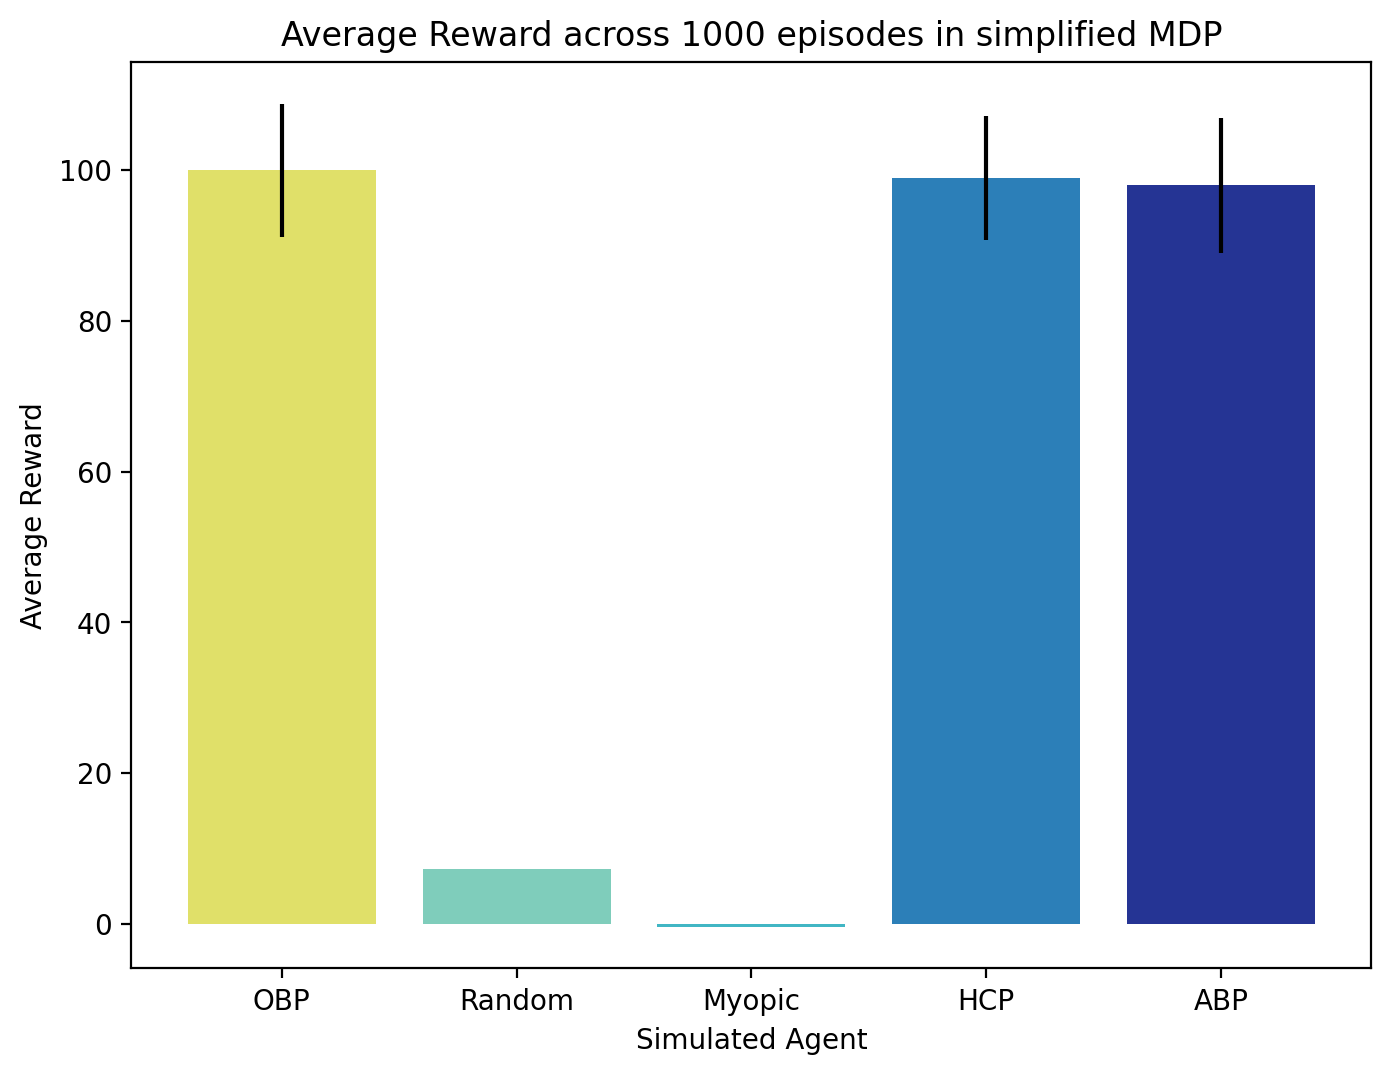

In [7]:
opt = pd.read_json("./results/sMDP/sMDP_results_Myopic_OptPseudoRewards.json")

r = pd.read_json("./results/sMDP/sMDP_results_Random.json")
m = pd.read_json("./results/sMDP/sMDP_results_Myopic.json")


hc = pd.read_json("./results/sMDP/sMDP_results_HandCrafted.json")
ma = pd.read_json("./results/sMDP/sMDP_results_GoalPR.json")



data = [opt,  r,m, hc, ma]
labels = ["OBP",  "Random", "Myopic", "HCP", "ABP"]
mean = []
std = []
for df in data:
    mean.append(df.groupby("run")["rewards"].mean().mean())
    std.append(df.groupby("run")["rewards"].mean().std())
print(mean)
print(std)
fig = plt.figure(figsize= (8,6), dpi = 200)
plt.bar(labels, mean, yerr = std, color = [ "#e0e069","#7fcdbb","#41b6c4","#2c7fb8","#253494"]) 
plt.ylabel("Average Reward")
plt.xlabel("Simulated Agent")
plt.title("Average Reward across 1000 episodes in simplified MDP")

In [4]:
ma[ma["level_up"]== True]["episode"].mean()

27.5825

In [5]:
opt[opt["level_up"]== True]["episode"].mean()

27.056

In [6]:
hc[hc["level_up"]== True]["episode"].mean()

27.29

In [18]:
from pathlib import Path
import os
hc_df = pd.DataFrame()
r_df = pd.DataFrame() 
ma_df = pd.DataFrame()
map_df = pd.DataFrame()
rma_df = pd.DataFrame()
for i in range(100):
    temp_df = pd.read_json("./results/lMDP/HandCrafted/lMDP_results_HandCrafted" + str(i) + ".json")
    temp_df["run"] = temp_df["run"] + i * 10 
    hc_df = pd.concat([hc_df, temp_df])
    
    temp_df = pd.read_json("./results/lMDP/Random/lMDP_results_Random" + str(i) + ".json")
    temp_df["run"] = temp_df["run"] + i * 10 
    r_df = pd.concat([r_df, temp_df])
    
    
    
for i in range(200):
    if i == 157:
        continue
    #temp_df = pd.read_json("./results/lMDP/GoalPR/lMDP_results_GoalPR" + str(i) + ".json")
    #temp_df["run"] = temp_df["run"] + i * 5 
    #ma_df = pd.concat([ma_df, temp_df])
    
    temp_df = pd.read_json("./results/lMDP/GoalPRwnP/lMDP_results_GoalPR" + str(i) + "wnP.json")
    temp_df["run"] = temp_df["run"] + i * 5 
    map_df = pd.concat([ma_df, temp_df])
   

    #if os.path.isfile("./results/lMDP/GoalPRround/newest_lMDP_results_GoalPRround" + str(i) + "wnP.json"):
    #if Path("./results/lMDP/GoalPRrounded/lMDP_results_GoalPRround" + str(i) + "wnP.json").exists():
    #    print("found file")
    #    temp_df = pd.read_json("./results/lMDP/GoalPRround/newest_lMDP_results_GoalPRround" + str(i) + "wnP.json")
    #    temp_df["run"] = temp_df["run"] + i * 5 
    #    rma_df = pd.concat([ma_df, temp_df])
  

In [12]:
delete_list = []
for run in rma_df["run"].unique():
    t = rma_df[rma_df["run"]== run]
    found = False
    for e in t["episode"].unique():
        if found:
            delete_list.append(t[t["episode"]==e].index)
            continue
        x = t[(t["episode"]==e)].index
        print(x)
        y = t.iloc[x[0], "levels"]
        print(y[0])
        if y[0] == 5:
            found = True
            
rma_df.drop(delete_list)
            
    
    

Int64Index([0], dtype='int64')


ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

[2.2284245333333335, 2.773471427667684, 2.748583085818649]
[0.04518656256992531, 0.01690967912925646, 0.014794799222187405]


Text(0.5, 1.0, 'Average Reward across 1000 episodes in original MDP')

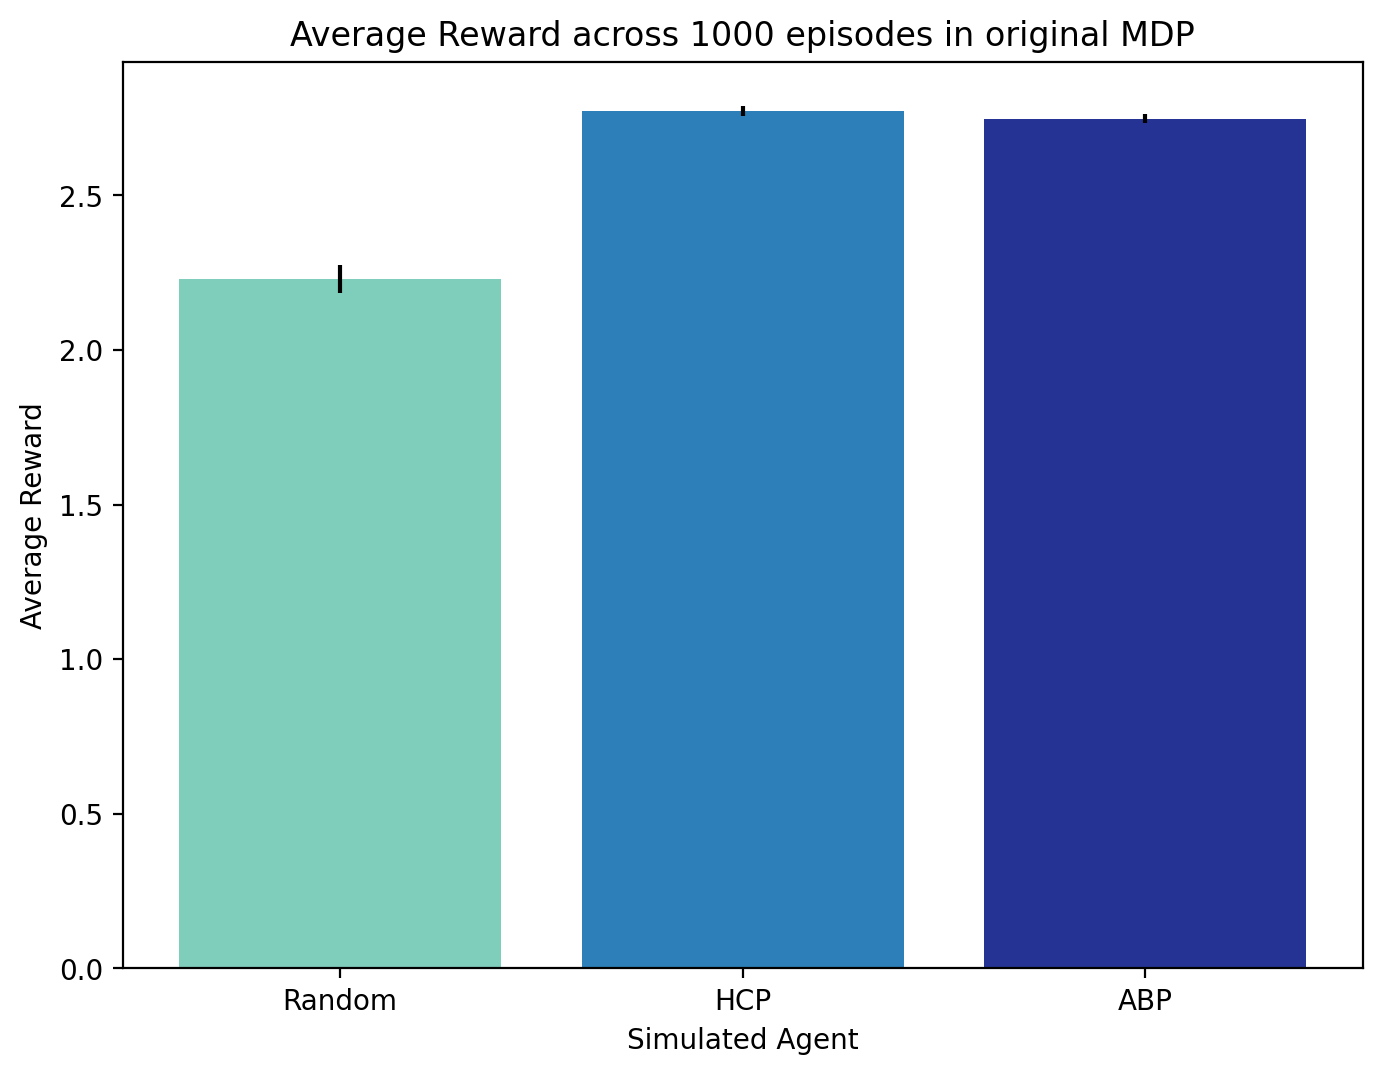

In [19]:


data = [r_df, hc_df, map_df]
labels = [ "Random", "HCP", "ABP"]
mean = []
std = []
for df in data:
    mean.append(df.groupby("run")["levels"].mean().mean())
    std.append(df.groupby("run")["levels"].mean().std())
    
print(mean)
print(std)
fig = plt.figure(figsize= (8,6), dpi = 200)
plt.bar(labels, mean, yerr = std, color = ["#7fcdbb","#2c7fb8","#253494","#2c7fb8"]) 
plt.ylabel("Average Reward")
plt.xlabel("Simulated Agent")
plt.title("Average Reward across 1000 episodes in original MDP")

In [20]:
hc_df = pd.DataFrame() 
ma_df = pd.DataFrame()
for i in range(250):
    temp_df = pd.read_json("./results/fMDP/HandCrafted/fMDP_results_HandCrafted" + str(i) + "wnP.json")
    temp_df["run"] = temp_df["run"] + i * 5 
    hc_df = pd.concat([hc_df, temp_df])
    
    temp_df = pd.read_json("./results/fMDP/GoalPR/fMDP_results_GoalPR" + str(i) + "wnP.json")
    temp_df["run"] = temp_df["run"] + i * 5 
    ma_df = pd.concat([ma_df, temp_df])

[0.7637353204625243, 0.8700853675216637]
[0.08732233074136009, 0.10491943480971444]


Text(0.5, 1.0, 'Average Reward across 250 episodes in large DoC-MDP')

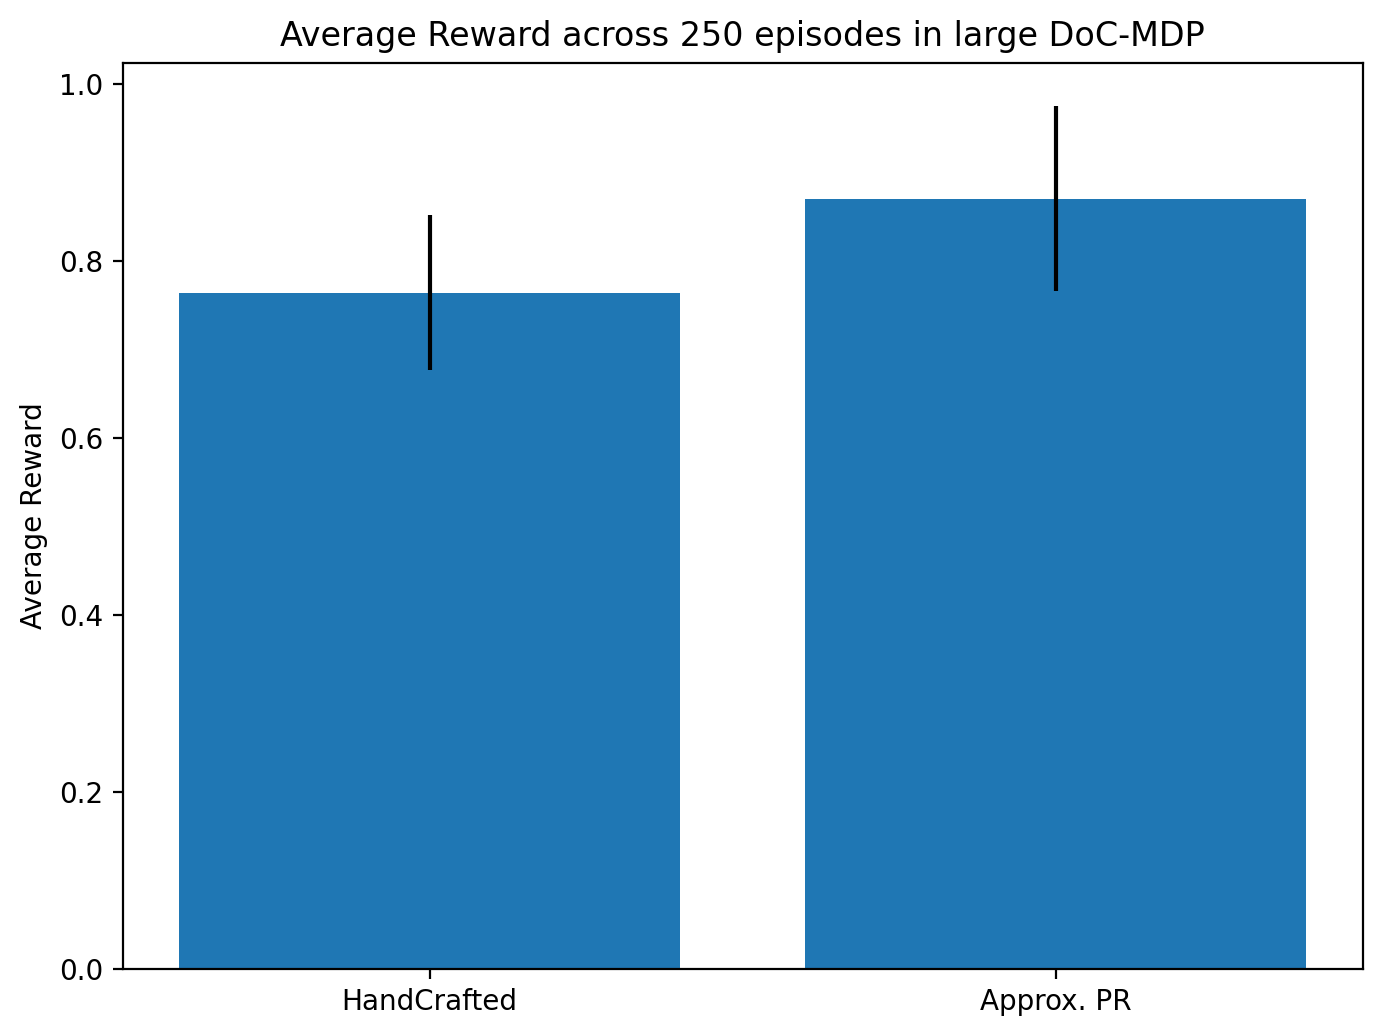

In [21]:
data = [hc_df, ma_df]
labels = ["HandCrafted", "Approx. PR"]
mean = []
std = []
for df in data:
    mean.append(df.groupby("run")["rewards"].mean().mean())
    std.append(df.groupby("run")["rewards"].mean().std())
    
print(mean)
print(std)
fig = plt.figure(figsize= (8,6), dpi = 200)
plt.bar(labels, mean, yerr = std) 
plt.ylabel("Average Reward")
plt.title("Average Reward across 250 episodes in large DoC-MDP")

In [22]:
import scipy.stats 
scipy.stats.kruskal(hc_df.groupby("run")["rewards"].mean(), ma_df.groupby("run")["rewards"].mean())

KruskalResult(statistic=150.0001555928145, pvalue=1.7335074922837305e-34)